In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, svm, tree
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB

%matplotlib inline

In [37]:
# http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29
# http://archive.ics.uci.edu/ml/datasets/Mammographic+Mass
# http://archive.ics.uci.edu/ml/datasets/Thoracic+Surgery+Data

In [38]:
X = dict()
y = dict()

# Load WDBC dataset
data = np.loadtxt("wdbc.data", delimiter=',')
X[0] = data[:, 2:]
y[0] = data[:,  1]

# Load Mammogram Mass dataset
data = np.loadtxt("mmass.data", delimiter=',')
X[1] = data[:, :5]
y[1] = data[:,  5]

# Load Thoraric Surgery dataset
data = np.loadtxt("ts.data", delimiter=',')
X[2] = data[:, :27]
y[2] = data[:,  27]

In [39]:
def ROC(X, y, clf, split, n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=n)
    clf.fit(X_train, y_train)
    y_predict = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_predict)
    return fpr, tpr

def Acc(X, y, clf, split, n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=n)
    clf.fit(X_train, y_train)
    return clf.score(X_test, y_test)

def Gmean(X, y, clf, split, n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split, random_state=n)
    clf.fit(X_train, y_train)
    prec = precision_score(y_test, clf.predict(X_test))
    rec = recall_score(y_test, clf.predict(X_test))
    return np.sqrt(prec * rec)

In [40]:
clf = dict()
# Decision tree
clf[0] = tree.DecisionTreeClassifier()
# Random Forest
clf[1] = RandomForestClassifier(n_estimators=100)
# Adaboost
clf[2] = AdaBoostClassifier(n_estimators=100)
# Naive Bayes
clf[3] = GaussianNB()
# SVM
clf[4] = svm.SVC(probability=True)
# Logistic Regression
clf[5] = linear_model.LogisticRegression(C=1e5)

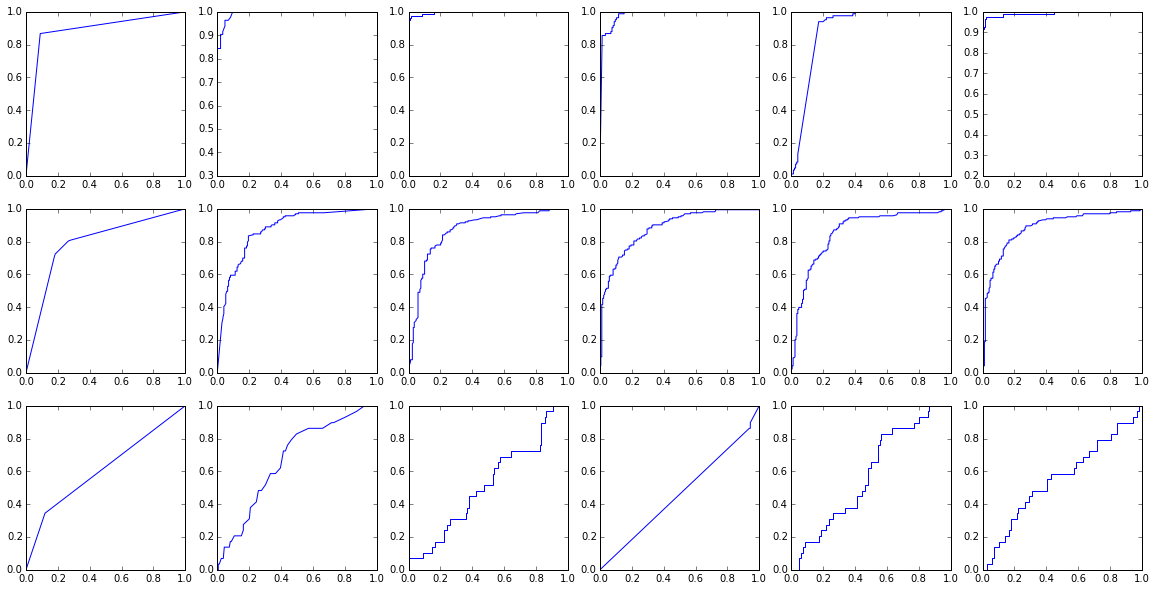

In [42]:
split = 0.4
aucs = np.zeros((3, 6))


f = plt.figure(figsize=(20,10))
for i in xrange(0, 3):
    for c in xrange(0, 6):
        fpr, tpr = ROC(X[i], y[i], clf[c], split, 0)
        plt.subplot(3, 6, 6*i+c+1)
        plt.plot(fpr, tpr)
        aucs[i, c] = auc(fpr, tpr)
        

In [47]:
print(aucs)

 [[ 78.02050247]
 [ 47.77916721]
 [  0.        ]
 [  0.        ]
 [  0.        ]
 [  0.        ]]


In [50]:
# Wisconsin Breast Cancer Diagnostic

# ￼Machine learning techniques to diagnose breast cancer 
#   from image-processed nuclear features of fine needle aspirates

# Prospective Accuracy is 97%

accs = np.zeros((6, 1))
for c in xrange(0, 6):
    print(c),
    for n in xrange(0, 100):
        accs[c] += Acc(X[0], y[0], clf[c], split, n)
accs /= 100
print(accs)

# With AdaBoost, we obtain an accuracy of 96.4%, around the 97% shown
# in the paper, but within their 95.5 - 98.5 confidence interval (at the
# 95% level)

0 1 2 3 4 5 [[ 0.92144737]
 [ 0.95618421]
 [ 0.96394737]
 [ 0.93434211]
 [ 0.62912281]
 [ 0.95587719]]


In [51]:
# Mammographic Mass

# Prediction of Breast Cancer Biopsy Outcomes 
#   Using a Distributed Genetic Programming Approach

# Best AUC was 0.860 +- 0.032

aucs = np.zeros((6, 1))
for c in xrange(0, 6):
    print(c),
    for n in xrange(0, 100):
        fpr, tpr = ROC(X[1], y[1], clf[c], split, n)
        aucs[c] += auc(fpr, tpr)
aucs /= 100

print(aucs)

# We achieved an AUC of 0.8987 with Logistic Regression, which is above
# the papers metric and their uncertainty of 0.828 - 0.892

0 1 2 3 4 5 [[ 0.7802003 ]
 [ 0.86851894]
 [ 0.8812941 ]
 [ 0.883924  ]
 [ 0.86845123]
 [ 0.89873425]]


In [52]:
# Thoracic Surgery

# Boosted SVM for extracting rules from imbalanced data in 
#   application to prediction of the post-operative life 
#   expectancy in the lung cancer patients

# The reported best geometric mean was 65.73 on this dataset.

gms = np.zeros((6, 1))
for c in xrange(0, 6):
    print(c),
    for n in xrange(0, 10):
        gms[c] += Gmean(X[2], y[2], clf[c], split, n)
gms /= 10

print(gms)

0 1 2 3 4 5 [[ 0.23308809]
 [ 0.03336217]
 [ 0.11304903]
 [ 0.39211991]
 [ 0.        ]
 [ 0.11258605]]


In [32]:
split = 0.4
X_train, X_test, y_train, y_test = train_test_split(X[2], y[2], test_size=split, random_state=1)
clf[1].fit(X_train, y_train)
prec = precision_score(y_test, clf[1].predict(X_test))
rec = recall_score(y_test, clf[1].predict(X_test))
print(y_test)
print(clf[1].predict(X_test))

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  1.
  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.
  0.  1.  0.  0.  1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1.  0.
  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  0.  1.  0.  1.  0.  0.  0.  0.  0.  1.  0.
  0.  1.  0.  0.  0.  1.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  1.  0.  1.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  1.  0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0. 